In [1]:
from keras.models import Model, Sequential
from keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
import numpy as np
from keras.preprocessing.image import load_img, save_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [3]:
from keras.models import model_from_json
#vgg_face = model_from_json(open("C:/Users/IS96273/Desktop/vgg_face_structure.json", "r").read())
model.load_weights('C:/Users/IS96273/Desktop/vgg_face_weights.h5')

In [4]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

In [5]:
def findCosineSimilarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [6]:
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [22]:
epsilon = 0.40

def verifyFace(img1, img2):
    img1_representation = vgg_face_descriptor.predict(preprocess_image('C:/Users/IS96273/Desktop/trainset/%s' % (img1)))[0,:]
    img2_representation = vgg_face_descriptor.predict(preprocess_image('C:/Users/IS96273/Desktop/trainset/%s' % (img2)))[0,:]
    
    cosine_similarity = findCosineSimilarity(img1_representation, img2_representation)
    euclidean_distance = findEuclideanDistance(img1_representation, img2_representation)
    
    print("Cosine similarity: ",cosine_similarity)
    print("Euclidean distance: ",euclidean_distance)
    
    if(cosine_similarity < epsilon):
        print("verified... they are same person")
    else:
        print("unverified! they are not same person!")
    
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(image.load_img('C:/Users/IS96273/Desktop/trainset/%s' % (img1)))
    plt.xticks([]); plt.yticks([])
    f.add_subplot(1,2, 2)
    plt.imshow(image.load_img('C:/Users/IS96273/Desktop/trainset/%s' % (img2)))
    plt.xticks([]); plt.yticks([])
    plt.show(block=True)
    print("-----------------------------------------")

Cosine similarity:  0.20822691917419434
Euclidean distance:  103.77788
verified... they are same person


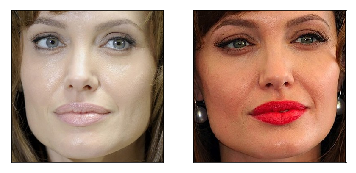

-----------------------------------------
Cosine similarity:  0.2582967281341553
Euclidean distance:  117.42356
verified... they are same person


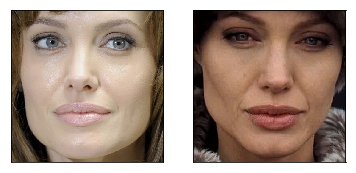

-----------------------------------------
Cosine similarity:  0.2543160319328308
Euclidean distance:  117.50486
verified... they are same person


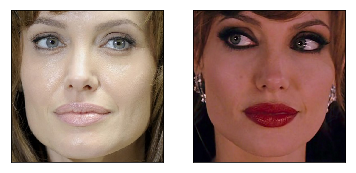

-----------------------------------------
Cosine similarity:  0.1433280110359192
Euclidean distance:  90.37805
verified... they are same person


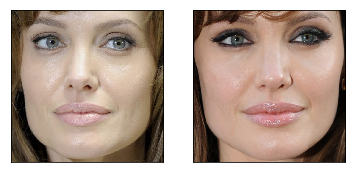

-----------------------------------------
Cosine similarity:  0.2271404266357422
Euclidean distance:  105.67802
verified... they are same person


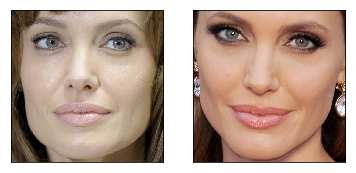

-----------------------------------------
Cosine similarity:  0.29707759618759155
Euclidean distance:  115.45584
verified... they are same person


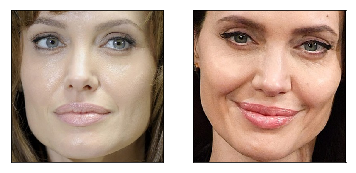

-----------------------------------------


In [23]:
verifyFace("1.jpg", "2.jpg")
verifyFace("1.jpg", "3.jpg")
verifyFace("1.jpg", "4.jpg")
verifyFace("1.jpg", "5.jpg")
verifyFace("1.jpg", "6.jpg")
verifyFace("1.jpg", "7.jpg")

Cosine similarity:  0.679842472076416
Euclidean distance:  170.79149
unverified! they are not same person!


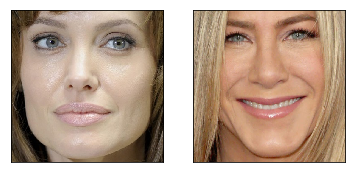

-----------------------------------------
Cosine similarity:  0.6239928007125854
Euclidean distance:  176.08841
unverified! they are not same person!


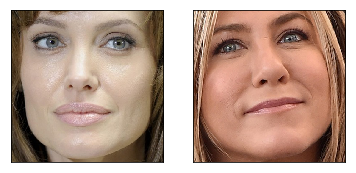

-----------------------------------------
Cosine similarity:  0.6415258646011353
Euclidean distance:  159.45297
unverified! they are not same person!


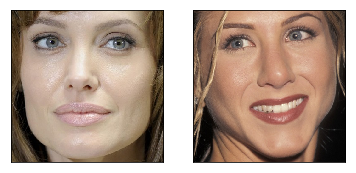

-----------------------------------------
Cosine similarity:  0.5965519547462463
Euclidean distance:  161.03818
unverified! they are not same person!


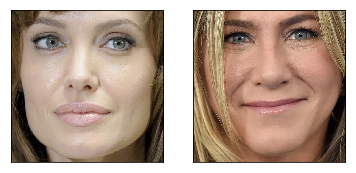

-----------------------------------------


In [24]:
verifyFace("1.jpg", "8.jpg")
verifyFace("1.jpg", "9.jpg")
verifyFace("1.jpg", "10.jpg")
verifyFace("1.jpg", "17.jpg")

Cosine similarity:  0.4811748266220093
Euclidean distance:  154.42801
unverified! they are not same person!


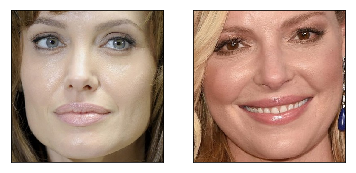

---------------------------------------------------------------
Cosine similarity:  0.42903584241867065
Euclidean distance:  140.56439
unverified! they are not same person!


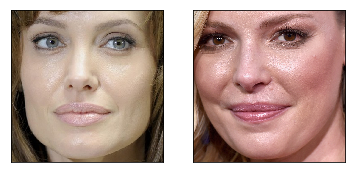

---------------------------------------------------------------


In [10]:
verifyFace("1.jpg", "11.jpg")
verifyFace("1.jpg", "12.jpg")

Cosine similarity:  0.12347197532653809
Euclidean distance:  73.73737
verified... they are same person


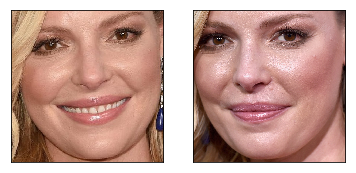

---------------------------------------------------------------


In [11]:
verifyFace("11.jpg", "12.jpg")

Cosine similarity:  0.25100594758987427
Euclidean distance:  102.43123
verified... they are same person


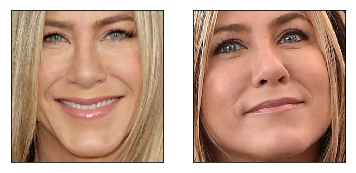

-----------------------------------------
Cosine similarity:  0.3642580509185791
Euclidean distance:  102.45407
verified... they are same person


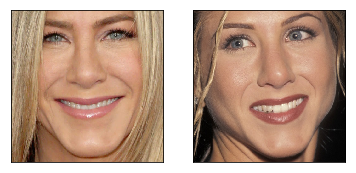

-----------------------------------------
Cosine similarity:  0.15262538194656372
Euclidean distance:  70.86718
verified... they are same person


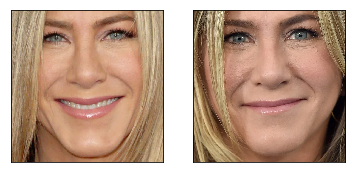

-----------------------------------------
Cosine similarity:  0.29216164350509644
Euclidean distance:  108.384125
verified... they are same person


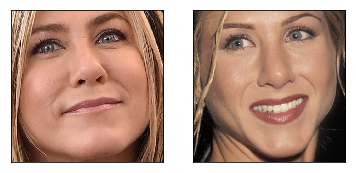

-----------------------------------------


In [25]:
verifyFace("8.jpg", "9.jpg")
verifyFace("8.jpg", "10.jpg")
verifyFace("8.jpg", "17.jpg")
verifyFace("9.jpg", "10.jpg")

Cosine similarity:  0.607557862997055
Euclidean distance:  155.95935
unverified! they are not same person!


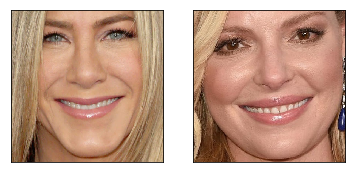

---------------------------------------------------------------
Cosine similarity:  0.6217842400074005
Euclidean distance:  148.7232
unverified! they are not same person!


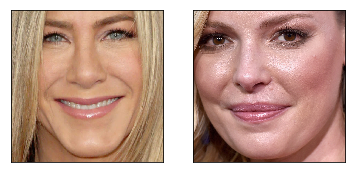

---------------------------------------------------------------


In [13]:
verifyFace("8.jpg", "11.jpg")
verifyFace("8.jpg", "12.jpg")

Cosine similarity:  0.37552928924560547
Euclidean distance:  115.34349
verified... they are same person


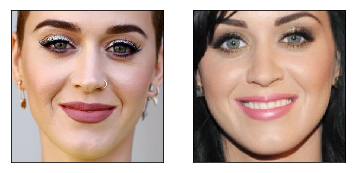

---------------------------------------------------------------
Cosine similarity:  0.359222412109375
Euclidean distance:  121.053856
verified... they are same person


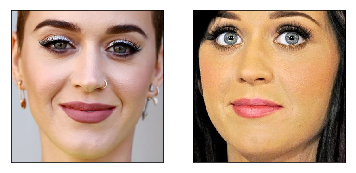

---------------------------------------------------------------
Cosine similarity:  0.18096429109573364
Euclidean distance:  89.01269
verified... they are same person


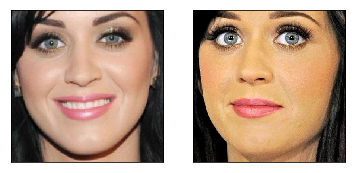

---------------------------------------------------------------


In [15]:
verifyFace("13.jpg", "14.jpg")
verifyFace("13.jpg", "16.jpg")
verifyFace("14.jpg", "16.jpg")